In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [18]:
path =r'Results_Large_MMS250'
filenames = glob.glob(path + "/*")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,sep=';',header=None))

In [20]:
locations_list=[True,False]
factors=[1,2,5,10,20,50,100,200] # MMS 250
#factors=[1,2,5,10,20,50] # MMS 750
#factors=[10] # MMS 250, Large
runs=10

columns=['run','time','total','L1','L2','L3','L4']

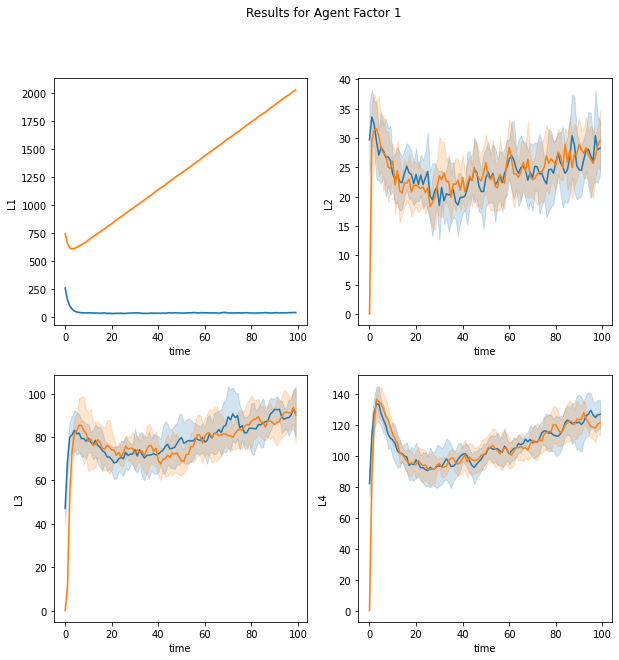

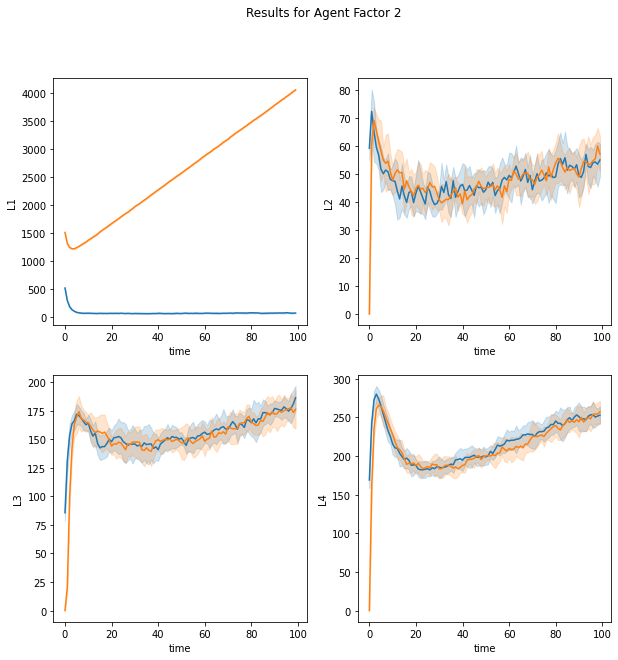

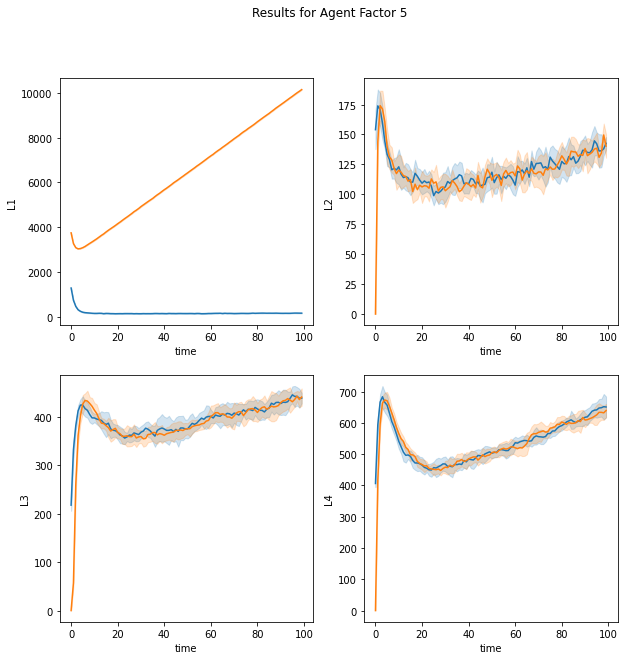

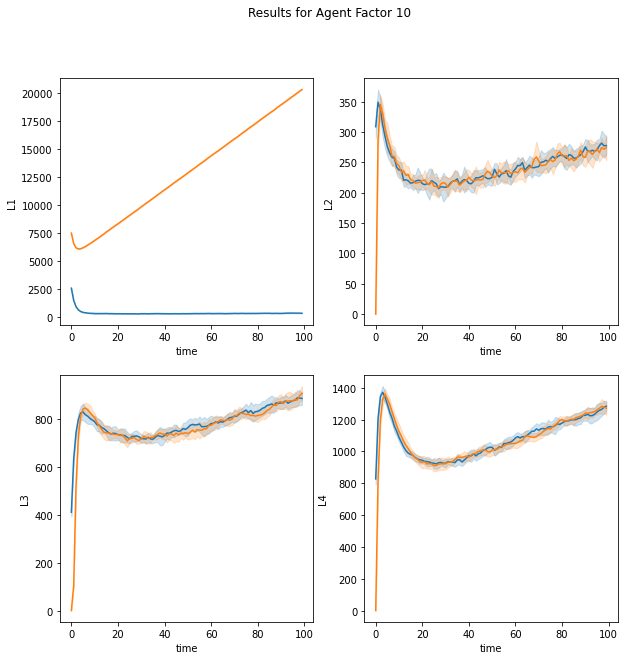

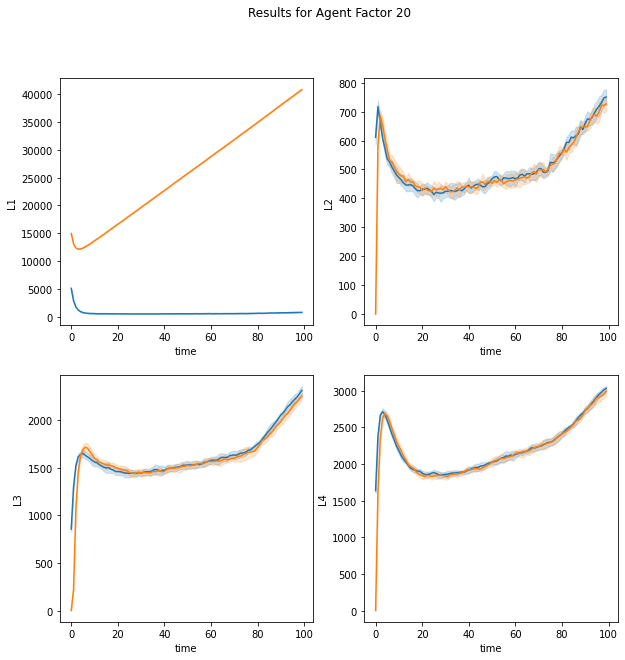

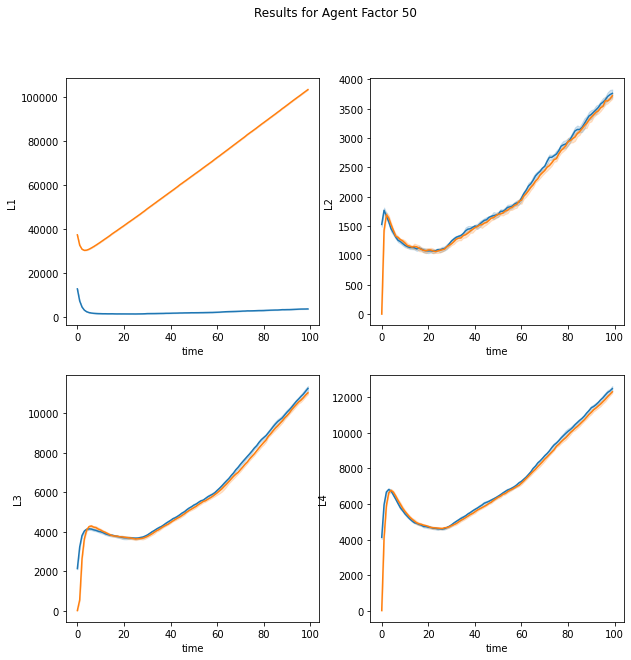

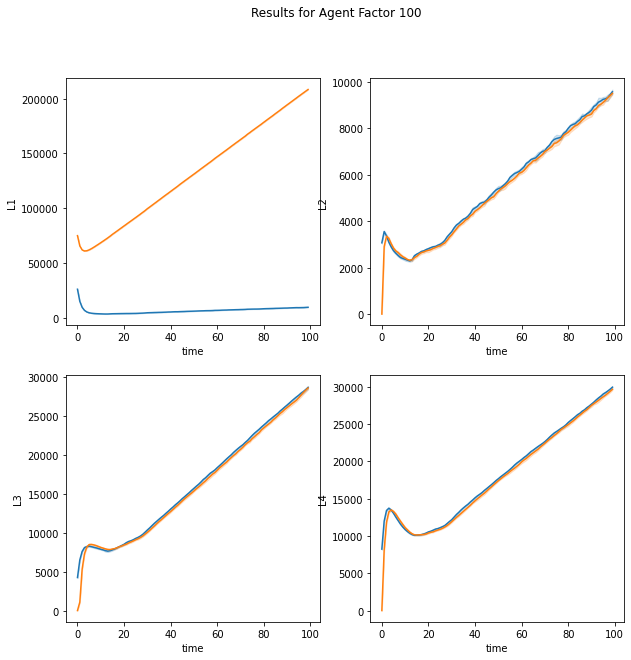

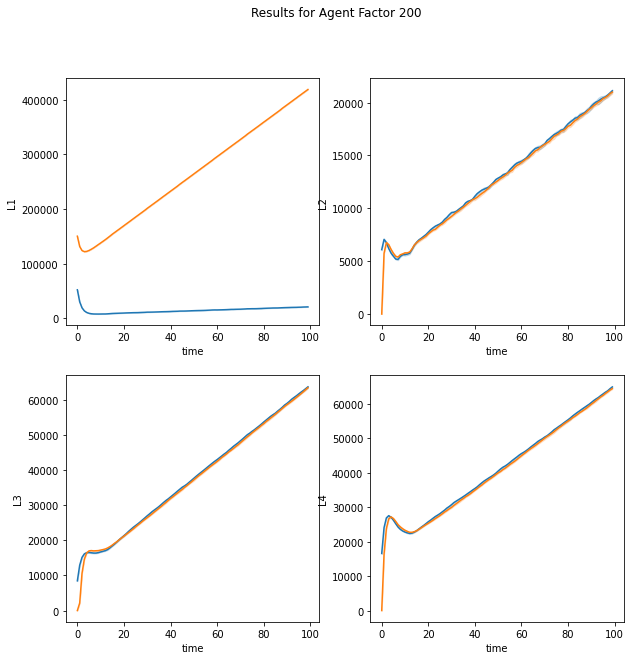

In [23]:
time_fast=[]
time_slow=[]
for ind in range(len(factors)):
    time_fast.extend(pd.read_csv(path+'/time_{}_{}_{}'.format(True,factors[ind],runs),header=None,names=columns).values)
    time_slow.extend(pd.read_csv(path+'/time_{}_{}_{}'.format(False,factors[ind],runs),header=None,names=columns).values)
    results_fast=pd.read_csv(path+'/results_{}_{}_{}'.format(True,factors[ind],runs),header=None,sep=';',names=columns)
    results_slow=pd.read_csv(path+'/results_{}_{}_{}'.format(False,factors[ind],runs),header=None,sep=';',names=columns)

    fig, axs = plt.subplots(2, 2,figsize=(10,10))
    sns.lineplot(data=results_fast,x='time',y='L1',ci='sd',ax=axs[0,0])
    sns.lineplot(data=results_slow,x='time',y='L1',ci='sd',ax=axs[0,0])
    sns.lineplot(data=results_fast,x='time',y='L2',ci='sd',ax=axs[0,1])
    sns.lineplot(data=results_slow,x='time',y='L2',ci='sd',ax=axs[0,1])
    sns.lineplot(data=results_fast,x='time',y='L3',ci='sd',ax=axs[1,0])
    sns.lineplot(data=results_slow,x='time',y='L3',ci='sd',ax=axs[1,0])
    sns.lineplot(data=results_fast,x='time',y='L4',ci='sd',ax=axs[1,1])
    sns.lineplot(data=results_slow,x='time',y='L4',ci='sd',ax=axs[1,1])
    fig.suptitle('Results for Agent Factor ' + str(factors[ind]))

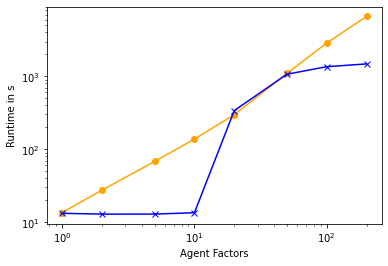

In [22]:
plt.loglog(factors,time_slow,'orange',marker='o')
plt.loglog(factors,time_fast,'blue',marker='x')
plt.plot()
plt.xlabel('Agent Factors')
plt.ylabel('Runtime in s')
plt.show()